## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 4: Linear Algebra
## Due 30 October, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 4. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory subset the general subject of Linear Algebra, for example covered in the following online books:
    - [Beezer](http://linear.ups.edu/html/fcla.html). Does not cover matrix exponentials, Caley-Hamilton, SVD, or PCA.
    - [Hefferon](http://joshua.smcvt.edu/linearalgebra/book.pdf). Also does not cover the above.
- The more advanced ideas are covered online as well. For example:
    - Matrix Exponentials are typically not covered until a course on linear different equations. But the [Wikipedia page](https://en.wikipedia.org/wiki/Matrix_exponential) is pretty good.
    - [Caley-Hamilton](https://brilliant.org/wiki/cayley-hamilton-theorem/)
    - [SVD](https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf)
    - [PCA](https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491)
- If you want the **best** textbooks in linear algebra, get
    - [Strang](https://www.amazon.com/Introduction-Linear-Algebra-Gilbert-Strang/dp/0980232775). Introductory. See also [Strang's Online Lectures](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/).
    - [Horn and Johnson](http://www.cse.zju.edu.cn/eclass/attachments/2015-10/01-1446086008-145421.pdf)

In [1]:
import math
import scipy # Has linear algebra
import scipy.ndimage
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline

import pandas as pd
import seaborn as sns
sns.set()

### 1. Linear independence  (10pts)

Which of the following sets of vectors are linearly independent? Why?

a) $\left (
\begin{array}{c}
1 \\
2 \\
3 \\
4
\end{array}
\right )$ and $\left (
\begin{array}{c}
5 \\
6 \\
7 \\
8
\end{array}
\right )$

b) $\left (
\begin{array}{c}
1 \\
1 \\
0 \\
0
\end{array}
\right )$, $\left (
\begin{array}{c}
0 \\
0 \\
1 \\
1
\end{array}
\right )$, $\left (
\begin{array}{c}
0 \\
1 \\
1 \\
0
\end{array}
\right )$ and $\left (
\begin{array}{c}
1 \\
0 \\
0 \\
1
\end{array}
\right )$

c) $\left (
\begin{array}{c}
1 \\
1 \\
0 \\
0
\end{array}
\right )$, $\left (
\begin{array}{c}
0 \\
0 \\
1 \\
1
\end{array}
\right )$, $\left (
\begin{array}{c}
0 \\
1 \\
1 \\
0
\end{array}
\right )$ and $\left (
\begin{array}{c}
0 \\
1 \\
0 \\
1
\end{array}
\right )$

$\textbf{Grading breakdown:}$
    
    10/3pts for explaining why they are linearly independent
    10/3pts (b) for explaining why they are NOT linearly independent
    10/3pts (c) for explaining why they are linearly independent

1.a)

Yes, it is clearly independent, but let's say some more about why. The row reduced echelon form of the matrix of these vectors stacked horizontally has two leading ones. (i.e. For this set of vectors to be linearly independent, the number of leading ones has to equal the number of vectors.)

In [2]:
'''
rref returns a tuple of two elements. The first is the reduced row echelon form, 
and the second is a tuple of indices of the pivot columns.
'''
x = np.array([[1],[2],[3],[4]])
y = np.array([[5],[6],[7],[8]])
A = np.hstack([x,y])

A = sm.Matrix(A)
print('The rank of A is ', A.rank(),'and the column dimension is', np.shape(A)[1])
A.rref()

The rank of A is  2 and the column dimension is 2


⎛⎡1  0⎤        ⎞
⎜⎢    ⎥        ⎟
⎜⎢0  1⎥        ⎟
⎜⎢    ⎥, (0, 1)⎟
⎜⎢0  0⎥        ⎟
⎜⎢    ⎥        ⎟
⎝⎣0  0⎦        ⎠

1.b)

No, it is linearly dependent. Observe that 
$$d = a + b - c $$

$$
\begin{pmatrix} 1 \\ 0 \\ 0 \\ 1 \end{pmatrix}  = 
\begin{pmatrix} 1 \\ 1 \\ 0 \\ 0 \end{pmatrix} +
\begin{pmatrix} 0 \\ 0 \\ 1 \\ 1 \end{pmatrix} - 
\begin{pmatrix} 0 \\ 1 \\ 1 \\ 0 \end{pmatrix} 
$$

In [3]:
a = np.array([[1],[1],[0],[0]])
b = np.array([[0],[0],[1],[1]])
c = np.array([[0],[1],[1],[0]])
d = np.array([[1],[0],[0],[1]]) 

A = np.hstack([a,b,c,d])
A = sm.Matrix(A)

print('The rank of A is', A.rank(), '\nThe column  dimension is', np.shape(A)[1], \
      '\ndet(A)=', A.det())
A.rref()

The rank of A is 3 
The column  dimension is 4 
det(A)= 0


⎛⎡1  0  0  1 ⎤           ⎞
⎜⎢           ⎥           ⎟
⎜⎢0  1  0  1 ⎥           ⎟
⎜⎢           ⎥, (0, 1, 2)⎟
⎜⎢0  0  1  -1⎥           ⎟
⎜⎢           ⎥           ⎟
⎝⎣0  0  0  0 ⎦           ⎠

1.c)

Yes. We'll use another test to show this. Recall that a set of $n$ vectors of length $n$ is linearly independent if the matrix with these vectors as columns has a non-zero determinant. We show this in python below.

In [4]:
a = np.array([[1],[1],[0],[0]])
b = np.array([[0],[0],[1],[1]])
c = np.array([[0],[1],[1],[0]])
d = np.array([[0],[1],[0],[1]])

A = np.hstack([a,b,c,d])

#Now check in sympy
A = sm.Matrix(A)
A.det()

-2

### 2. Orthogonality (10pts)

a) Find two orthogonal vectors that are also orthogonal to the vector
$v = \left (
\begin{array}{c}
1 \\
-1 \\
3 \\
\end{array}
\right ).$

b) Argue that the resulting set of three vectors form a basis for for $\mathbb{R}^3$.

c) Express the vector $x = \left (
\begin{array}{c}
1 \\
2 \\
3
\end{array}
\right )$ as a linear combination of your three vectors. 

$\textbf{Grading breakdown:}$
    
    1pt for finding a vector w that is orthogonal to v
    1pt for finding a vector u that is orthogonal to v
    3pt if u,v,w are all mutually orthogonal
    3pts (b) for arguing that the set forms a basis (mutually linearly independent, and there are 3 vectors)
    2pts (c) for finding the coefficients a1, a2, a3 that represent x in the new basis
    

2.a)

We're looking for all vectors $w$ that satisfy $v \cdot w = 0 $ for $x,y,z\in \mathbb{R}:$
$$0 = 
    \begin{pmatrix} 1 & -1 & 3 \end{pmatrix} \cdot
    \begin{pmatrix} x \\ y \\ z \end{pmatrix} 
$$

Geometrically, this means vectors in the plane $$x-y+3z = 0.$$

Notice that we can reexpress one of these values in terms of the others. For instance

$$y = (x+3z)$$
so
$$\begin{pmatrix} x \\ (x+3z) \\ z \end{pmatrix} = 
x\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix} + 
z\begin{pmatrix} 0 \\ 3 \\ 1 \end{pmatrix}.$$
Therefore, any vector in $$\text{span}\{\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ 3 \\ 1 \end{pmatrix} \}$$ will work.

We'll just choose $x=z=1$ to get

$$w = \begin{pmatrix} 1 \\ 4 \\ 1 \end{pmatrix}.$$

Next, we need to find a vector $u$ that is orthogonal to both $v,w$. To do this we could procede as follows. From $(x ,y ,z) \cdot w = 0$ we see that

$$0 = x + 4y + z \implies x = -4y - z$$ and if we set $$x - y +3z = 0 = x + 4y +z$$

$$\implies 0 = 5y - 2z.$$ So let's just pick $y=2$, and $z=5$. Then $x = -4(2) - (5) = -13.$

Thus,
$$u = \begin{pmatrix} -13 \\ 2 \\ 5 \end{pmatrix}.$$

In [5]:
v = np.array([[1],[-1],[3]])
w = np.array([[1],[4],[1]])
u = np.array([[-13],[2],[5]]) 

#Check if orthogonal
v.transpose()@w, v.transpose()@u, w.transpose()@u

(array([[0]]), array([[0]]), array([[0]]))

**ALTERNATIVELY**

We shall use Gram-Schmidt orthogonalization to determine the final vector. As we showed above, any vector in 

$$\text{span}\{\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ 3 \\ 1 \end{pmatrix} \}$$ 

will be orthogonal to $v$. Let's denote that first vector as $w_1$ and the second vector as $w_2$. To get $u$ we use the following formula:

$$u = w_2 - proj_{w_1}(w_2)$$

$$= w_2 - \frac{w_2 \cdot w_1}{w_1 \cdot w_1} w_1$$

$$ = \begin{pmatrix} 0 \\ 3 \\ 1 \end{pmatrix} - 
\frac{
\begin{pmatrix} 0 & 3 & 1 \end{pmatrix} 
\cdot 
\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}}
{\begin{pmatrix} 1 & 1 & 0 \end{pmatrix} 
\cdot
\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}
}\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}$$

$$ = \begin{pmatrix} 0 \\ 3 \\ 1 \end{pmatrix} - 
\frac{3}
{2}
\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}$$

$$
u = \begin{pmatrix} -\frac{3}{2} \\ \frac{3}{2} \\ 1 \end{pmatrix}.$$

In [6]:
w1 = np.array([[1],[1],[0]]) # 1st vector in spanning set and the 1st orthogonal vector to v we choose

w2 = np.array([[0],[3],[1]]) # 2nd vector in spanning set and is NOT orthogonal to u

u_GS = w2 - ((w2.transpose() @ w1)[0] / (w1.transpose() @ w1)[0]) * w1

v.transpose()@w1, v.transpose()@u_GS, w1.transpose()@u_GS

(array([[0]]), array([[0.]]), array([[0.]]))

2.b)

Recall the definition of a basis: 

A linearly independent set of vectors $\{v_1,...,v_n\}$ is a **basis** for a vector space $V$ if $span(v_1,...,v_n) = V$. (i.e. if $v_1,...,v_n$ are mutually orthogonal and $dim(V) = n$). 

Thus, $\{u,v,w\}$ in any order form a basis for $\mathbb{R}^3$ because they are mutually orthogonal, and there are enough vectors--i.e. we need 3 of such vectors to cover all of $\mathbb{R}^3$.

2.c) 

Notice that 
$$x = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} = 
a_1\begin{pmatrix} -\frac{3}{2} \\ \frac{3}{2} \\ 1 \end{pmatrix} + 
a_2\begin{pmatrix} 1 \\ -1 \\ 3 \end{pmatrix} +
a_3\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}$$

can be reexpressed as $x = Az$

$$\begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} = 
\begin{pmatrix} 
    -\frac{3}{2} & 1 & 1 \\ 
     \frac{3}{2} & -1 & 1 \\
     1 & 3 & 0
\end{pmatrix}
\begin{pmatrix} a_1 \\ a_2 \\ a_3 \end{pmatrix}.
$$

We can solve for the coefficients quickly by running this linear system through a solver.

In [7]:
x = np.array([[1],[2],[3]])
A = np.hstack([u_GS, v, w1])
a1, a2, a3 = np.linalg.solve(A,x) #numerically solve for the coeffecients
print('\na1=', a1[0], '\na2=', a2[0],'\na3=', a3[0])

a1*u_GS + a2*v + a3*w1 #verify that these add up to (1,2,3)^T


a1= 0.8181818181818182 
a2= 0.7272727272727273 
a3= 1.5


array([[1.],
       [2.],
       [3.]])

**More explicitly**

We can write out 

$$x = \begin{pmatrix} 1 \\ 2 \\3 \end{pmatrix} = a_1 u + a_2 v + a_3 w$$

and use orthogonality to determine concise formulas for the coefficients. Thus,

$$a_1 = \frac{x \cdot u}{u \cdot u} = \frac{9}{11}$$

$$a_2 = \frac{x \cdot v}{v \cdot v} =  \frac{8}{11}$$

$$a_3 = \frac{x \cdot w}{w \cdot w} = \frac{3}{2}.$$ And our new representation of $x$ in basis $B$ is 

$$x_{[B]} = \begin{pmatrix} a_1 \\ a_2 \\ a_3 \end{pmatrix}.$$

### 3. Magnitude (10pts)

Recall the set of rotation matrices defined by

$$
R(\theta) = 
\begin{pmatrix}
\cos \theta & \sin \theta \\
-\sin \theta & \cos \theta
\end{pmatrix}.
$$

for each $\theta \in \mathbb{R}$. Show that if $x \in \mathbb{R}^2$ that the magnitude of $x$ is equal to the magnitude of $R(\theta)x$ for all $\theta$. Thus, rotations do not affect magnitudes. 

$\textbf{Grading breakdown:}$
    
    3pts for using the definition of magnitude on Rx
    4pts for doing the elementwise multiplication OR showing that R is orthogonal
    3pts for a convicing argument that ||Rx|| = ||x||.


We begin with the definition of magnitude. Let $\theta \in \mathbb{R},$ and $x\in \mathbb{R}^2$. Then we have
$$\begin{align}
||R(\theta)x|| &= \sqrt{(R(\theta)x)^T(R(\theta)x)} \\
&= \sqrt{x^TR(\theta)^TR(\theta) x} \\
&= \sqrt{x^Tx} \\
&= ||x||
\end{align} 
$$
because
$$
\begin{align}
R(\theta)^TR(\theta) &= 
\begin{bmatrix} \sin^2(\theta)+\cos^2(\theta) & 0 \\ 0 & \sin^2(\theta)+\cos^2(\theta)\end{bmatrix} \\ 
&= \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \text{via trig identities.}
\end{align}
$$

Thus, rotations do not affect magnitudes.

In [8]:
#In sympy
o = sm.symbols('theta')
R = sm.Matrix([[sm.cos(o), sm.sin(o)],[-sm.sin(o), sm.cos(o)]])
R.transpose()@R 

⎡   2         2                      ⎤
⎢sin (θ) + cos (θ)          0        ⎥
⎢                                    ⎥
⎢                      2         2   ⎥
⎣        0          sin (θ) + cos (θ)⎦

### 4. Inverses (10pts)

Find the inverse of each of the following matrices, or explain why no inverse exists.

$
A = \begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{pmatrix}
$

B = $
\begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & -1 & 0
\end{pmatrix}
$

$\textbf{Grading breakdown:}$
    
    5pts for numerically finding A^-1 or providing a derivation that leads to the correct answer
    5pts for explaining why B does not have an inverse

4.a)



In [9]:
A = np.array([[0,1,1],[1,0,1],[1,1,0]])
detA = np.linalg.det(A)
print('The determinant is',detA)
np.linalg.inv(A)

The determinant is 2.0


array([[-0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5],
       [ 0.5,  0.5, -0.5]])

More explicitly, we can use the Cayley Hamilton Theorem to find this inverse. First, let's find the characteristic polynomial.

$$
det(sI - A) = \begin{vmatrix}
s & -1 & -1 \\
-1 & s & -1 \\
-1 & -1 & s
\end{vmatrix}
$$

$$
= s \begin{vmatrix}
s & -1\\
-1 & s\\
\end{vmatrix}
-
(-1) \begin{vmatrix}
-1 & -1\\
-1 & s\\
\end{vmatrix}
+
(-1) \begin{vmatrix}
-1 & s\\
-1 & -1\\
\end{vmatrix}
$$

$$ = s^3 - 3s - 2.$$

Now, using C.H. we can say

$$p(A) = A^3 - 3A -2I = 0$$

and multiplyin both sides by $A^{-1}$ implies

$$\begin{align}
A^{-1} &= \frac{1}{2} (A^2 - 3I)\\
&= 
\frac{1}{2}
\begin{bmatrix}
-1 & 1 & 1 \\
1 & -1 & 1 \\
1 & 1 & -1
\end{bmatrix}.
\end{align}$$

In [10]:
#Let's check in sympy
A = sm.Matrix([[0,1,1],[1,0,1],[1,1,0]])
my_Ainv = sm.Rational(1,2) * (A**2 - 3*sm.eye(3))
A.charpoly(), A.inv(), my_Ainv

⎛                                                            ⎡-1/2  1/2   1/2 
⎜                                                            ⎢                
⎜PurePoly(_lambda**3 - 3*_lambda - 2, _lambda, domain='ZZ'), ⎢1/2   -1/2  1/2 
⎜                                                            ⎢                
⎝                                                            ⎣1/2   1/2   -1/2

⎤  ⎡-1/2  1/2   1/2 ⎤⎞
⎥  ⎢                ⎥⎟
⎥, ⎢1/2   -1/2  1/2 ⎥⎟
⎥  ⎢                ⎥⎟
⎦  ⎣1/2   1/2   -1/2⎦⎠

4.b)



In [11]:
B = np.array([[0,1,1],[1,0,-1],[1,1,0]])
detB = np.linalg.det(B)
try:
    np.linalg.inv(B)
except:
    print('The determinant is',detB,'therefore B is a singular matrix, and has no inverse.')

The determinant is 0.0 therefore B is a singular matrix, and has no inverse.


### 5. Commutativity (10pts)

In three dimensions, there are three different kinds of rotations, one for rotation about each axis. These are defined as follows:

$$
R_x(\theta) = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & \cos \theta  & \sin \theta  \\
0 & -\sin \theta & \cos \theta 
\end{pmatrix}.
$$

$$
R_z(\theta) = 
\begin{pmatrix}
\cos \theta  & 0 & \sin \theta \\
0 & 1 & 0 \\
-\sin \theta & 0 & \cos \theta 
\end{pmatrix}.
$$

$$
R_z(\theta) = 
\begin{pmatrix}
\cos \theta  & \sin \theta & 0 \\
-\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{pmatrix}.
$$

Are these matrices pairwise commutative in general? That is: Is it the case that

$$
R_x(\theta_1)R_y(\theta_2) = R_y(\theta_2)R_x(\theta_1)
$$

and similarly for $x,z$ and $y,z$? Explain your answer.

$\textbf{Grading breakdown:}$
    
    2.5pts for finding Rx1 @ Ry2 and Ry2 @ Rx1
    2.5pts for finding Rx1 @ Rz2 and Rz2 @ Rx1
    2.5pts for finding Ry1 @ Rz2 and Rz2 @ Ry1
    2.5pts for a convincing explaination (e.g. could be physically or mathematically motivated)


5)

In general, rotation matrices **do not** commute. We use sympy to show the calculations below and verify by inspection.

In [56]:
o1, o2 = sm.symbols('theta1 theta2')

Rx1 = sm.Matrix([[1, 0, 0],[0, sm.cos(o1), sm.sin(o1)],[0, -sm.sin(o1), sm.cos(o1)]])
Ry1 = sm.Matrix([[sm.cos(o1), 0, sm.sin(o1)],[0, 1, 0],[-sm.sin(o1), 0, sm.cos(o1)]])

Ry2 = sm.Matrix([[sm.cos(o2), 0, sm.sin(o2)],[0, 1, 0],[-sm.sin(o2), 0, sm.cos(o2)]])
Rz2 = sm.Matrix([[sm.cos(o2), sm.sin(o2), 0],[-sm.sin(o2), sm.cos(o2), 0],[0, 0, 1]])

#Let's check the first pair
Rx1@Ry2, Ry2@Rx1

⎛⎡    cos(θ₂)          0          sin(θ₂)    ⎤  ⎡cos(θ₂)   -sin(θ₁)⋅sin(θ₂)  s
⎜⎢                                           ⎥  ⎢                             
⎜⎢-sin(θ₁)⋅sin(θ₂)  cos(θ₁)   sin(θ₁)⋅cos(θ₂)⎥, ⎢   0          cos(θ₁)        
⎜⎢                                           ⎥  ⎢                             
⎝⎣-sin(θ₂)⋅cos(θ₁)  -sin(θ₁)  cos(θ₁)⋅cos(θ₂)⎦  ⎣-sin(θ₂)  -sin(θ₁)⋅cos(θ₂)  c

in(θ₂)⋅cos(θ₁)⎤⎞
              ⎥⎟
   sin(θ₁)    ⎥⎟
              ⎥⎟
os(θ₁)⋅cos(θ₂)⎦⎠

In [57]:
#Let's check the 2nd pair
Rx1@Rz2, Rz2@Rx1

⎛⎡    cos(θ₂)           sin(θ₂)          0   ⎤  ⎡cos(θ₂)   sin(θ₂)⋅cos(θ₁)  si
⎜⎢                                           ⎥  ⎢                             
⎜⎢-sin(θ₂)⋅cos(θ₁)  cos(θ₁)⋅cos(θ₂)   sin(θ₁)⎥, ⎢-sin(θ₂)  cos(θ₁)⋅cos(θ₂)  si
⎜⎢                                           ⎥  ⎢                             
⎝⎣sin(θ₁)⋅sin(θ₂)   -sin(θ₁)⋅cos(θ₂)  cos(θ₁)⎦  ⎣   0         -sin(θ₁)        

n(θ₁)⋅sin(θ₂)⎤⎞
             ⎥⎟
n(θ₁)⋅cos(θ₂)⎥⎟
             ⎥⎟
  cos(θ₁)    ⎦⎠

In [58]:
#Let's check the 3rd pair 
Ry1@Rz2, Rz2@Ry1

⎛⎡cos(θ₁)⋅cos(θ₂)   sin(θ₂)⋅cos(θ₁)   sin(θ₁)⎤  ⎡cos(θ₁)⋅cos(θ₂)   sin(θ₂)  si
⎜⎢                                           ⎥  ⎢                             
⎜⎢    -sin(θ₂)          cos(θ₂)          0   ⎥, ⎢-sin(θ₂)⋅cos(θ₁)  cos(θ₂)  -s
⎜⎢                                           ⎥  ⎢                             
⎝⎣-sin(θ₁)⋅cos(θ₂)  -sin(θ₁)⋅sin(θ₂)  cos(θ₁)⎦  ⎣    -sin(θ₁)         0       

n(θ₁)⋅cos(θ₂) ⎤⎞
              ⎥⎟
in(θ₁)⋅sin(θ₂)⎥⎟
              ⎥⎟
  cos(θ₁)     ⎦⎠

One explaination:

The multiplication of rotation matrices corresponds to a composition of the rotations, applied from left to right. Compositions of rotations characterized by different axes of rotation don't share eigenvectors. Thus, they don't preserve each others' eigenspaces, and cannot commute. 

In [64]:
Rx1.eigenvects()

⎡               ⎛                                  ⎡⎡        0        ⎤⎤⎞  ⎛  
⎢               ⎜                                  ⎢⎢                 ⎥⎥⎟  ⎜  
⎢⎛      ⎡⎡1⎤⎤⎞  ⎜     ______________               ⎢⎢    -sin(θ₁)     ⎥⎥⎟  ⎜  
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜    ╱    2                        ⎢⎢─────────────────⎥⎥⎟  ⎜  
⎢⎜1, 1, ⎢⎢0⎥⎥⎟, ⎜- ╲╱  cos (θ₁) - 1  + cos(θ₁), 1, ⎢⎢   ______________⎥⎥⎟, ⎜╲╱
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜                                  ⎢⎢  ╱    2         ⎥⎥⎟  ⎜  
⎢⎝      ⎣⎣0⎦⎦⎠  ⎜                                  ⎢⎢╲╱  cos (θ₁) - 1 ⎥⎥⎟  ⎜  
⎢               ⎜                                  ⎢⎢                 ⎥⎥⎟  ⎜  
⎣               ⎝                                  ⎣⎣        1        ⎦⎦⎠  ⎝  

                              ⎡⎡        0        ⎤⎤⎞⎤
                              ⎢⎢                 ⎥⎥⎟⎥
 ______________               ⎢⎢     sin(θ₁)     ⎥⎥⎟⎥
╱    2                        ⎢⎢─────────────────⎥⎥⎟⎥
  cos (θ₁) - 1  + cos(θ₁), 1, ⎢⎢   ______________⎥⎥⎟⎥
                  

In [49]:
Ry1.eigenvects()

⎡               ⎛                                  ⎡⎡    -sin(θ₁)     ⎤⎤⎞  ⎛  
⎢               ⎜                                  ⎢⎢─────────────────⎥⎥⎟  ⎜  
⎢⎛      ⎡⎡0⎤⎤⎞  ⎜     ______________               ⎢⎢   ______________⎥⎥⎟  ⎜  
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜    ╱    2                        ⎢⎢  ╱    2         ⎥⎥⎟  ⎜  
⎢⎜1, 1, ⎢⎢1⎥⎥⎟, ⎜- ╲╱  cos (θ₁) - 1  + cos(θ₁), 1, ⎢⎢╲╱  cos (θ₁) - 1 ⎥⎥⎟, ⎜╲╱
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜                                  ⎢⎢                 ⎥⎥⎟  ⎜  
⎢⎝      ⎣⎣0⎦⎦⎠  ⎜                                  ⎢⎢        0        ⎥⎥⎟  ⎜  
⎢               ⎜                                  ⎢⎢                 ⎥⎥⎟  ⎜  
⎣               ⎝                                  ⎣⎣        1        ⎦⎦⎠  ⎝  

                              ⎡⎡     sin(θ₁)     ⎤⎤⎞⎤
                              ⎢⎢─────────────────⎥⎥⎟⎥
 ______________               ⎢⎢   ______________⎥⎥⎟⎥
╱    2                        ⎢⎢  ╱    2         ⎥⎥⎟⎥
  cos (θ₁) - 1  + cos(θ₁), 1, ⎢⎢╲╱  cos (θ₁) - 1 ⎥⎥⎟⎥
                  

In [50]:
Rz2.eigenvects()

⎡               ⎛                                  ⎡⎡    -sin(θ₂)     ⎤⎤⎞  ⎛  
⎢               ⎜                                  ⎢⎢─────────────────⎥⎥⎟  ⎜  
⎢⎛      ⎡⎡0⎤⎤⎞  ⎜     ______________               ⎢⎢   ______________⎥⎥⎟  ⎜  
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜    ╱    2                        ⎢⎢  ╱    2         ⎥⎥⎟  ⎜  
⎢⎜1, 1, ⎢⎢0⎥⎥⎟, ⎜- ╲╱  cos (θ₂) - 1  + cos(θ₂), 1, ⎢⎢╲╱  cos (θ₂) - 1 ⎥⎥⎟, ⎜╲╱
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜                                  ⎢⎢                 ⎥⎥⎟  ⎜  
⎢⎝      ⎣⎣1⎦⎦⎠  ⎜                                  ⎢⎢        1        ⎥⎥⎟  ⎜  
⎢               ⎜                                  ⎢⎢                 ⎥⎥⎟  ⎜  
⎣               ⎝                                  ⎣⎣        0        ⎦⎦⎠  ⎝  

                              ⎡⎡     sin(θ₂)     ⎤⎤⎞⎤
                              ⎢⎢─────────────────⎥⎥⎟⎥
 ______________               ⎢⎢   ______________⎥⎥⎟⎥
╱    2                        ⎢⎢  ╱    2         ⎥⎥⎟⎥
  cos (θ₂) - 1  + cos(θ₂), 1, ⎢⎢╲╱  cos (θ₂) - 1 ⎥⎥⎟⎥
                  

### 6. Orthogonal Matrices (10pts)

The set of reflection matrices is defined by

$$
S(\theta) = 
\begin{pmatrix}
\cos 2\theta & \sin 2 \theta \\
\sin 2\theta & -\cos 2 \theta
\end{pmatrix}.
$$

a) Show how $S(\frac{\pi}{4})$ transforms the vector $(1\;-1)^T$. 

b) Show that $S(\theta)$ does not change any vectors that happen to lie on the axis of reflection.

c) Show that these matrices are orthogonal for all $\theta$. 

$\textbf{Grading breakdown:}$
    
    2pts for showing how the vector is transformed
    2pts (b) for choosing v(theta) = [cos(theta) sin(theta)]^T
    1pt (b) for multiplying by S(theta)
    2pts (b) for simplifying the result to equal v(theta)
    3pts (c) for for a convincing argument to show that these matrices are orthogonal for all theta


In [15]:
#6.a) First let's see what's happening in python

S = lambda arg: sm.Matrix([[sm.cos(2*arg), sm.sin(2*arg)],[sm.sin(2*arg), -sm.cos(2*arg)]])
v = sm.Matrix([[1],[-1]])
v, S(sm.pi / 4), S(sm.pi / 4)@v

⎛⎡1 ⎤  ⎡0  1⎤  ⎡-1⎤⎞
⎜⎢  ⎥, ⎢    ⎥, ⎢  ⎥⎟
⎝⎣-1⎦  ⎣1  0⎦  ⎣1 ⎦⎠

Now, more formally, let's apply $S(\frac{\pi}{4})$ to $\begin{pmatrix} x \\ y \end{pmatrix}$ to see what happens:

$$
\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
\begin{pmatrix} x \\ y \end{pmatrix}
= 
(x)\begin{pmatrix} 0 \\ 1 \end{pmatrix} +
(y)\begin{pmatrix} 1 \\ 0 \end{pmatrix}
 = \begin{pmatrix} y \\ x \end{pmatrix}$$
 
So that means $x\leftarrow y$ and $y \leftarrow x$ (i.e. they swap positions). Graphically, this indicates a reflection about the line $L$ represented by the equation $y=x$ (i.e. $\theta = \frac{\pi}{4}$).

In [16]:
xs = np.linspace(-2,2,100)
ys = xs

S45 = np.array([[0,1],[1,0]]) # Reflection matrix
p = np.array([[1],[-1]]) # Given point in R^2
p2 = np.array([[1],[1]]) # Point on the axis of reflection
Spx, Spy = S45@p
Spx2, Spy2 = S45@p2

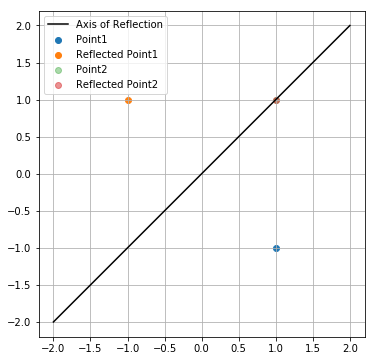

In [17]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(xs, ys, c='k')
ax.scatter(p[0], p[1])
ax.scatter(Spx, Spy)
ax.scatter(p2[0], p2[1], alpha=0.4)
ax.scatter(Spx2, Spy2, alpha=0.5)
ax.grid('on')
ax.legend(['Axis of Reflection','Point1','Reflected Point1','Point2','Reflected Point2'])
ax.set_aspect('equal')

plt.show()

6.b)

To show that $S(\theta)$  does not change any vectors that happen to lie on the axis of reflection, we consider the transformation on the vector $v(\theta) = \begin{pmatrix} \cos{(\theta)} & \sin{(\theta)} \end{pmatrix}^T$, i.e. a vector on the axis of rotation, shown in `sympy` below.

In [18]:
o = sm.symbols('theta')
S_theta = sm.Matrix([[sm.cos(2*o), sm.sin(2*o)],[sm.sin(2*o), -sm.cos(2*o)]])
vec = sm.Matrix([[sm.cos(o)],[sm.sin(o)]])
S_theta @ vec

⎡sin(θ)⋅sin(2⋅θ) + cos(θ)⋅cos(2⋅θ) ⎤
⎢                                  ⎥
⎣-sin(θ)⋅cos(2⋅θ) + sin(2⋅θ)⋅cos(θ)⎦

Next, we make use of the product identities and even and odd properties of trig functions:

$$\sin{(\theta)}\sin{(2\theta)} = \frac{1}{2}(\cos{(\theta)} - \cos{(3\theta)}) $$

$$\cos{(\theta)}\cos{(2\theta)} = \frac{1}{2}(\cos{(3\theta)} + \cos{(\theta)}) $$

$$\sin{(\theta)}\cos{(2\theta)} = \frac{1}{2}(\sin{(3\theta)} - \sin{(\theta)}) $$

$$\sin{(2\theta)}\cos{(\theta)} = \frac{1}{2}(\sin{(3\theta)} + \sin{(\theta)}) $$

So we see

$$
S(\theta)v(\theta) = 
    \begin{pmatrix}
        \cos 2\theta & \sin 2 \theta \\
        \sin 2\theta & -\cos 2 \theta
    \end{pmatrix}
    \begin{pmatrix} \cos{(\theta)} \\ \sin{(\theta)} \end{pmatrix}
$$    

$$
= 
    \begin{pmatrix}
        \sin{(\theta)}\sin{(2\theta)} + \cos{(\theta)}\cos{(2 \theta)} \\
        -\sin{(\theta)}\cos{(2\theta)} + \sin{(2\theta)}\cos{(\theta)}
    \end{pmatrix}
$$

$$
= 
    \begin{pmatrix}
        \frac{1}{2} (\cos{(\theta)} - \cos{(3\theta)}) + \frac{1}{2} (\cos{(3\theta)} + \cos{(\theta)} )\\
        \frac{1}{2} (- \sin{(3\theta)} + \sin{(\theta)} ) + \frac{1}{2} ( \sin{(3\theta)} + \sin{(\theta)} )
    \end{pmatrix}
$$

$$
= \begin{pmatrix} \cos{(\theta)} \\ \sin{(\theta)} \end{pmatrix}
$$

$$=v(\theta).$$

Thus, $S(\theta)$  does not change any vectors that happen to lie on the axis of reflection.

6.c)

To show that these matrices are orthogonal for all $\theta$ we try to verify a definition:  **a matrix is orthogonal if its transpose is equal to its inverse.** Note that $1 = \sin^2{(x)} + \cos^2{(x)}$.

In [19]:
o = sm.symbols('theta')
S_theta = sm.Matrix([[sm.cos(2*o), sm.sin(2*o)],[sm.sin(2*o), -sm.cos(2*o)]])
S_theta.transpose() @ S_theta

⎡   2           2                            ⎤
⎢sin (2⋅θ) + cos (2⋅θ)            0          ⎥
⎢                                            ⎥
⎢                          2           2     ⎥
⎣          0            sin (2⋅θ) + cos (2⋅θ)⎦

Thus, regardless of the $\theta$ we choose, $S(\theta)$ is orthogonal.

### 7. Similarity (10pts)

Show that the following two matrices are similar.

$
A = \begin{pmatrix}
2 & 4 & 6 \\
0 & 2 & 0 \\
1 & 1 & 0
\end{pmatrix}
$

B = $
\begin{pmatrix}
1 & -1 & 2 \\
4 & 2 & 1 \\
5 & 1 & 1
\end{pmatrix}
$

$\textbf{Grading breakdown:}$
    
    3pt for finding the characteristic polynomial of A, B and showing they are the same
    4pt for showing that the eigenvalues are the same
    3pts for showing that the determinants are the same


7)

Remember from lecture the definition and properties of similarity:

**Def:** $X$ and $Y$ are **similar** if there exists an invertible matrix $Q$ such that $Y = Q X Q^{-1}$. 

**Some (of many) properties (i.e. necessary conditions):**

- Similar matrices have the same determinant. $|B| = |Q A Q^{-1}| = |Q||Q^{-1}||A| = |A|$. 
- Similar matrices have the same characteristic polynomial. 
- Similar matrices have the same eigenvalues.
- $\dots$

We will use the **necessary and sufficient condition** that:

$A$ and $B$ are similar $\iff$ they have the same Jordan Normal Form.

In [8]:
Pa, Ja = A.jordan_form()
Pb, Jb = B.jordan_form()
Ja, Jb

⎛⎡2    0        0   ⎤  ⎡2    0        0   ⎤⎞
⎜⎢                  ⎥  ⎢                  ⎥⎟
⎜⎢0  1 + √7     0   ⎥, ⎢0  1 + √7     0   ⎥⎟
⎜⎢                  ⎥  ⎢                  ⎥⎟
⎝⎣0    0     -√7 + 1⎦  ⎣0    0     -√7 + 1⎦⎠

Below, we illustrate that the neccesary conditions mentioned in the properties hold.

In [2]:
A = sm.Matrix([[2,4,6],[0,2,0],[1,1,0]])
B = sm.Matrix([[1,-1,2],[4,2,1],[5,1,1]])

for a,b in zip(A.eigenvals(), B.eigenvals()):
    print(a, '==', b, 'is', a == b)
    
print('\nAre the determinants of A and B equal? Answer:', A.det() == B.det())

2 == 2 is True
-sqrt(7) + 1 == -sqrt(7) + 1 is True
1 + sqrt(7) == 1 + sqrt(7) is True

Are the determinants of A and B equal? Answer: True


In [21]:
# Now we check if A and B have the same characteristic equations
s = sm.symbols('s')

sI = s * sm.eye(3)
charEqA = (sI - A).det()
charEqB = (sI - A).det()

charEqA, charEqB

⎛         2                      2           ⎞
⎝s⋅(s - 2)  - 6⋅s + 12, s⋅(s - 2)  - 6⋅s + 12⎠

### 8. Diagonalization (10pts)

Diagonalize the matrices in problem 7 (you can use `sympy`) and show they have the same diagonal form.

$\textbf{Grading breakdown:}$
    
    5pts for finding the diagonalization of A
    5pts for finding the diagonalization of B

8)

Because `diagonalize` returns a tuple $(P,D)$, where $D$ is diagonal and $M=PDP^{−1}$, we can implement this easily in python. Notice that while $P_A,P_B$ are different, $D_A,D_B$ are the same!

In [5]:
P_A, D_A = A.diagonalize()
P_A, D_A

⎛⎡7   1 + √7  -√7 + 1⎤  ⎡2    0        0   ⎤⎞
⎜⎢                   ⎥  ⎢                  ⎥⎟
⎜⎢-3    0        0   ⎥, ⎢0  1 + √7     0   ⎥⎟
⎜⎢                   ⎥  ⎢                  ⎥⎟
⎝⎣2     1        1   ⎦  ⎣0    0     -√7 + 1⎦⎠

In [6]:
P_B, D_B = B.diagonalize()
P_B, D_B

⎛⎡      1   √7    √7   1⎤                      ⎞
⎜⎢-1  - ─ + ──  - ── - ─⎥                      ⎟
⎜⎢      6   6     6    6⎥  ⎡2    0        0   ⎤⎟
⎜⎢                      ⎥  ⎢                  ⎥⎟
⎜⎢     √7   5     √7   5⎥, ⎢0  1 + √7     0   ⎥⎟
⎜⎢9    ── + ─   - ── + ─⎥  ⎢                  ⎥⎟
⎜⎢     6    6     6    6⎥  ⎣0    0     -√7 + 1⎦⎟
⎜⎢                      ⎥                      ⎟
⎝⎣4      1         1    ⎦                      ⎠

### 9. Cayley Hamilton (10pts)

a) Use the Cayley Hamilton Theorem to come up with an expression for $A^n$ in terms of $n$ when 

$$
A = \begin{pmatrix}
-\frac{1}{2} & 1  \\
0 & \frac{1}{4}
\end{pmatrix} .
$$

b) Define $x_{k+1} = A x_k$ and argue that no matter what value $x_0$ is, $x_{k+1}$ converges to $(0 \; 0)^T$. 

c) Choose $x_0 = (-2,3)^T$ and plot $x_k$ for $k = 0$ to $10$. Plot the two components of of $x_k$ as two separate trajectories overlaid on the same plot.

$\textbf{Grading breakdown:}$
    
    1pt for finding the characteristic polynomial of A
    1pt for using the CH formula to find p(A)=0
    2pts for finding an expression for A^n in terms of n
    1pts (b) for finding an explicit formula for x_k+1
    3pts (b) for for a convincing argument to show that x_k+1 converges to zero regardless of x0
    1pt (c) for plotting the x component
    1pt (c) for plotting the y component

In [24]:
A = sm.Matrix([[sm.Rational(-1,2), 1],[0, sm.Rational(1,4)]]) 
Q, L = A.diagonalize()
Q, L, Q.inv(), Q @ L @ Q.inv()

⎛⎡1  4⎤  ⎡-1/2   0 ⎤  ⎡1  -4/3⎤  ⎡-1/2   1 ⎤⎞
⎜⎢    ⎥, ⎢         ⎥, ⎢       ⎥, ⎢         ⎥⎟
⎝⎣0  3⎦  ⎣ 0    1/4⎦  ⎣0  1/3 ⎦  ⎣ 0    1/4⎦⎠

9.a)

Recall the **Caley-Hamilton Theorem**: A matrix solves its own characteristic polynomial (i.e. $p(A) = 0$).

The characteristic polynomial of $A$ is $p(s) = (s−\frac{1}{4})(s+ \frac{1}{2}) = s^2 + \frac{s}{4} - \frac{1}{8}.$

Hence 

$$  A^2 = -\frac{A}{4} + \frac{I}{8} $$

$$  A^n = -\frac{A^{n-1}}{4} + \frac{A^{n-2}}{8}. $$

We could more specifically express this as:

$$ = - \frac{1}{4} Q \begin{pmatrix} (\frac{-1}{2})^{n-1} & 0 \\ 0 & (\frac{1}{4})^{n-1} \end{pmatrix}Q^{-1}  + \frac{1}{8} Q \begin{pmatrix} (\frac{-1}{2})^{n-2} & 0 \\ 0 & (\frac{1}{4})^{n-2} \end{pmatrix} Q^{-1} $$

where $Q, Q^{-1}$ are defined in the code above.

9.b)

Let's begin by ennumerating terms of $x_{k+1} = A x_k$ and find an explicit form: 

$$\begin{align}
x_{1} &= Ax_0 \\
x_{2} &= Ax_1 = A(Ax_0) = A^2x_0 \\
x_{3} &= Ax_2 = A(A^2x_0) = A^3x_0\\
& \vdots \\
x_{n} &= A^nx_0. \\
\end{align}$$

Now, let's take the limit as $k\rightarrow \infty:$

$$\lim \limits_{k\rightarrow \infty} x_{k+1} = \lim \limits_{k\rightarrow \infty}  A^{k+1}x_0$$

Because the eigenvalues of $A$ are $\frac{-1}{2}, \frac{1}{4}$ (i.e. distinct and nonzero) we can diagonalize it into a matrix of eigenvectors, $Q$, and a diagonal matrix of eigenvalues, $\Lambda:$ 

$$A = Q\Lambda Q^{-1}.$$ 

Furthermore, because $A^2 = Q\Lambda (Q^{-1}Q)\Lambda Q^{-1} = Q\Lambda^2 Q^{-1} \implies A^n = Q\Lambda^n Q^{-1}.$

Thus,

$$\begin{align}
\lim \limits_{k\rightarrow \infty} x_{k+1} &= x_0 \lim \limits_{k\rightarrow \infty}  Q\Lambda^k Q^{-1} \\
&= x_0 \lim \limits_{k\rightarrow \infty}  Q 
\begin{pmatrix} (\frac{-1}{2})^k & 0 \\ 0 & (\frac{1}{4})^k \end{pmatrix}
Q^{-1} \\
&= x_0 Q 
\begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}
Q^{-1} \\
&= 0.
\end{align}$$

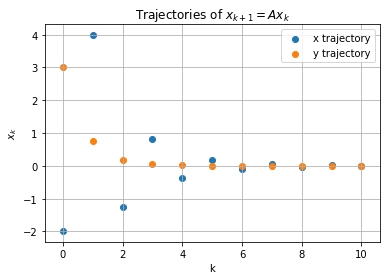

⎡                     ⎡ 13 ⎤  ⎡-23  ⎤  ⎡  49  ⎤  ⎡ -95  ⎤  ⎡ 193   ⎤  ⎡ -383  
⎢⎡-2⎤  ⎡ 4 ⎤  ⎡-5/4⎤  ⎢ ── ⎥  ⎢──── ⎥  ⎢ ───  ⎥  ⎢ ──── ⎥  ⎢ ────  ⎥  ⎢ ───── 
⎢⎢  ⎥, ⎢   ⎥, ⎢    ⎥, ⎢ 16 ⎥, ⎢ 64  ⎥, ⎢ 256  ⎥, ⎢ 1024 ⎥, ⎢ 4096  ⎥, ⎢ 16384 
⎢⎣3 ⎦  ⎣3/4⎦  ⎣3/16⎦  ⎢    ⎥  ⎢     ⎥  ⎢      ⎥  ⎢      ⎥  ⎢       ⎥  ⎢       
⎣                     ⎣3/64⎦  ⎣3/256⎦  ⎣3/1024⎦  ⎣3/4096⎦  ⎣3/16384⎦  ⎣3/65536

⎤  ⎡  769   ⎤  ⎡ -1535   ⎤⎤
⎥  ⎢ ─────  ⎥  ⎢ ──────  ⎥⎥
⎥, ⎢ 65536  ⎥, ⎢ 262144  ⎥⎥
⎥  ⎢        ⎥  ⎢         ⎥⎥
⎦  ⎣3/262144⎦  ⎣3/1048576⎦⎦

In [25]:
# 9.c)

k = np.arange(0,11)
x0 = np.array([[-2],[3]])
xks = [A**i @ x0 for i in k]
xk_1 = [element[0] for element in xks] # Make an array of the first component of the vectors
xk_2 = [element[1] for element in xks] # Make an array of the second component of the vectors

plt.scatter(k, xk_1)
plt.scatter(k, xk_2)
plt.grid('on')
plt.title(r'Trajectories of $x_{k+1} = A x_k$')
plt.xlabel('k')
plt.ylabel(r'$x_k$')
plt.legend(['x trajectory','y trajectory'])
plt.show()

xks

### 10. Matrix Exponential Properties (10pts)
---

Recall that for matrices $A$ and $B$ that it is not necessarily the case that $AB = BA$ (i.e. that $A$ and $B$ commute). Show that 

a) If $AB=BA$ then $e^Ae^B = e^Be^A$ using the definition of the matrix exponential as a series.

b) Find an example in 2D where $A$ and $B$ do not commute and show that $e^Ae^B \neq e^Be^A$.

$\textbf{Grading breakdown:}$
    
    2pts for stating the definitions of e^A, e^B
    2pts for using the assumption AB=BA 
    2pts for for a convincing argument to show that e^Ae^B = e^Be^A if AB=BA
    2pts (b) for finding two matrices that do not commute
    2pts (b) for showing that e^Ae^B does not equal e^Be^A

10.a)

Recall from lecture, when $A \in \mathbb{R}^{n\times n}$, then the we define the **matrix exponential** $e^{A}$ by
$$
e^{A} \triangleq I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \dots
$$
Now assume $AB=BA$. By using the definition we see

$$
%step 1
e^{A}e^{B} = (I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \dots)(I + B + \frac{B^2}{2!} + \frac{B^3}{3!} + \dots),
$$

and we can group the terms to use in a FOIL expansion

$$
%step 2: group terms
e^{A}e^{B} = [I + (A + \frac{A^2}{2!} + \frac{A^3}{3!} + \dots)][I + (B + \frac{B^2}{2!} + \frac{B^3}{3!} + \dots)].
$$

Next, the FOIL expansion gives us

$$
%step 3 FOIL expansion
e^{A}e^{B} = [I + (B + \frac{B^2}{2!} + \frac{B^3}{3!} + \dots) + (A + \frac{A^2}{2!} + \frac{A^3}{3!} + \dots) + (A + \frac{A^2}{2!} + \frac{A^3}{3!} + \dots)(B + \frac{B^2}{2!} + \frac{B^3}{3!} + \dots)].
$$

We'll use FOIL expansion again on the last term, use the fact that $AB=BA$, and regroup some of the terms as

$$
%step 4: group expanded terms
e^{A}e^{B} = [I + (A+B) + \frac{1}{2!}(A^2 + B^2 + 2AB) + (\frac{1}{3!}(A^3 + B^3) + \frac{1}{2!}(A^2B + AB^2)) + \dots]
$$

reexpressing them as the following:

$$
%step 5: group expanded terms
e^{A}e^{B} = [I + (A+B) + \frac{1}{2!}(A^2 + B^2 + 2AB) + \frac{1}{3!}(A^3 + 3A^2B + 3AB^2 + B^3) + \dots].
$$

Lastly, we will collect the terms as

$$
%step 6: collect terms
e^{A}e^{B} = [I + (A+B) + \frac{1}{2!}(A+B)^2 + \frac{1}{3!}(A+B)^3 + \dots].
$$

This process can be repeated to show that:

$$
%step 6: by definintion of the infinte series
e^{A}e^{B} = e^{A+B}.
$$

And since $A+B = B+A \implies e^{A+B} = e^{B+A}$, we can conclude that $e^Ae^B = e^Be^A$. 

10.b)

We'll use two matrices from physics that are famous, the Pauli spin matrices:

$
\sigma_x = 
\begin{pmatrix}
0 & 1  \\
1 & 0
\end{pmatrix} 
$
and
$
\sigma_z = 
\begin{pmatrix}
1 & 0  \\
0 & -1
\end{pmatrix}, 
$
where:
$
\sigma_x\sigma_z = 
\begin{pmatrix}
0 & -1  \\
1 & 0
\end{pmatrix} 
$
and
$
\sigma_z\sigma_x = 
\begin{pmatrix}
0 & 1  \\
-1 & 0
\end{pmatrix} 
$.

Expaning like before we see
$$
%step 1 FOIL expansion
e^{\sigma_x}e^{\sigma_z} = [I + (\sigma_z + \frac{\sigma_z^2}{2!} + \frac{\sigma_z^3}{3!} + \dots) + (\sigma_x + \frac{\sigma_x^2}{2!} + \frac{\sigma_x^3}{3!} + \dots) + (\sigma_x + \frac{\sigma_x^2}{2!} + \frac{\sigma_x^3}{3!} + \dots)(\sigma_z + \frac{\sigma_z^2}{2!} + \frac{\sigma_z^3}{3!} + \dots)]
$$

$$
%step 2: group expanded terms
e^{\sigma_x}e^{\sigma_z} = [I + (\sigma_z+\sigma_x) + \frac{1}{2!}(\sigma_x^2 + \sigma_z^2 + \sigma_x\sigma_z + \sigma_z\sigma_x) + (\frac{1}{3!}(\sigma_x^3 + \sigma_z^3) + \frac{1}{2!}(\sigma_x^2\sigma_z + \sigma_x\sigma_z^2)) + \dots]
$$

Notice that $2\sigma_x\sigma_z  = 
\begin{pmatrix}
0 & -2  \\
2 & 0
\end{pmatrix} $
but $\sigma_x\sigma_z + \sigma_z\sigma_x = \begin{pmatrix}
0 & 0  \\
0 & 0
\end{pmatrix} $. So we can't say $e^{\sigma_x}e^{\sigma_z} = e^{\sigma_x + \sigma_z}$.

Similarly, compare
$$
%step 1 FOIL expansion
e^{\sigma_z}e^{\sigma_x} = [I + (\sigma_x + \frac{\sigma_x^2}{2!} + \frac{\sigma_x^3}{3!} + \dots) + (\sigma_z + \frac{\sigma_z^2}{2!} + \frac{\sigma_z^3}{3!} + \dots) + (\sigma_z + \frac{\sigma_z^2}{2!} + \frac{\sigma_z^3}{3!} + \dots)(\sigma_x + \frac{\sigma_x^2}{2!} + \frac{\sigma_x^3}{3!} + \dots)]
$$

$$
%step 2: group expanded terms
e^{\sigma_z}e^{\sigma_x} = [I + (\sigma_x+\sigma_z) + \frac{1}{2!}(\sigma_z^2 + \sigma_x^2 + \sigma_z\sigma_x + \sigma_x\sigma_z) + (\frac{1}{3!}(\sigma_z^3 + \sigma_x^3) + \frac{1}{2!}(\sigma_z^2\sigma_x + \sigma_z\sigma_x^2)) + \dots]
$$

Notice that $2\sigma_z\sigma_x  = 
\begin{pmatrix}
0 & 2  \\
-2 & 0
\end{pmatrix} $
but $\sigma_z\sigma_x + \sigma_x\sigma_z = \begin{pmatrix}
0 & 0  \\
0 & 0
\end{pmatrix} $.  So we can't say $e^{\sigma_x + \sigma_z} = e^{\sigma_z + \sigma_x} = e^{\sigma_z}e^{\sigma_x}$.

Therefore, $e^{\sigma_x}e^{\sigma_z} \neq e^{\sigma_z}e^{\sigma_x}$.

In [26]:
# Let's use sympy to verfiy our reasoning
sx = sm.Matrix([[0,1],[1,0]])
sz = sm.Matrix([[1,0],[0,-1]])

LHS = sm.exp(sx)*sm.exp(sz) 
RHS = sm.exp(sz)*sm.exp(sx)
print(LHS == RHS)

LHS, RHS

False


⎛⎡   ⎛ -1    ⎞   ⎛   -1    ⎞    ⎤  ⎡    ⎛ -1    ⎞      ⎛   -1    ⎞⎤⎞
⎜⎢   ⎜ℯ     ℯ⎟   ⎜  ℯ     ℯ⎟  -1⎥  ⎢    ⎜ℯ     ℯ⎟      ⎜  ℯ     ℯ⎟⎥⎟
⎜⎢ ℯ⋅⎜─── + ─⎟   ⎜- ─── + ─⎟⋅ℯ  ⎥  ⎢  ℯ⋅⎜─── + ─⎟    ℯ⋅⎜- ─── + ─⎟⎥⎟
⎜⎢   ⎝ 2    2⎠   ⎝   2    2⎠    ⎥  ⎢    ⎝ 2    2⎠      ⎝   2    2⎠⎥⎟
⎜⎢                              ⎥, ⎢                              ⎥⎟
⎜⎢  ⎛   -1    ⎞   ⎛ -1    ⎞     ⎥  ⎢⎛   -1    ⎞      ⎛ -1    ⎞    ⎥⎟
⎜⎢  ⎜  ℯ     ℯ⎟   ⎜ℯ     ℯ⎟  -1 ⎥  ⎢⎜  ℯ     ℯ⎟  -1  ⎜ℯ     ℯ⎟  -1⎥⎟
⎜⎢ℯ⋅⎜- ─── + ─⎟   ⎜─── + ─⎟⋅ℯ   ⎥  ⎢⎜- ─── + ─⎟⋅ℯ    ⎜─── + ─⎟⋅ℯ  ⎥⎟
⎝⎣  ⎝   2    2⎠   ⎝ 2    2⎠     ⎦  ⎣⎝   2    2⎠      ⎝ 2    2⎠    ⎦⎠

### 11. Senators Revisited (10pts)

Repeat the clustering of senators by voting habit for the years 1999, 1979 and 1959. Plot them together with the 2019 plot in a grid of plots. Which years seem the most divided? 

Note you will need to get the data at [https://voteview.com/data](https://voteview.com/data). Choose "Member's Votes", "Senate Only", the desired year, and CSV file. 

I had to edit the CSV file (in a text editor or ExCEL) to remove the heading in the first row before loading the file.

**Extra credit:** Color the each dot in the plots by whether the senator is a republican (red), democract (blue), or independent (green). This information is not in the data files above, so you'll need to find it elsewhere.
[https://voteview.com/articles/data_help_members]

$\textbf{Grading breakdown:}$
    
    1pt for importing {S085, S095, S105, S115} OR {S086, S096, S106, S116}
    2pts for arguing which years seem to be the most divided
    2pts for constructing the voting matrices: A
    2pts for constructing the voting habit matrices: T
    2pts for plotting them together through subplot
    1pts for labeling everything
    +4pts for doing the extra credit

Looking at the graphs, we can conclude that 2019 and 1999 are clearly more divided, because the clusters are more distinct and further apart in the partisan component.

In [3]:
# rollnumber = issue id
# icpsr = Integer 1-99999. This is an ID code which identifies the member in question.
# cast_code = vote outcome

my_dataS085 = np.genfromtxt('S085_votes_data.csv', delimiter=',', dtype=np.int8)
my_dataS095 = np.genfromtxt('S095_votes_data.csv', delimiter=',', dtype=np.int8)
my_dataS105 = np.genfromtxt('S105_votes_data.csv', delimiter=',', dtype=np.int8)
my_dataS115 = np.genfromtxt('S115_votes_data.csv', delimiter=',', dtype=np.int8)

In [4]:
def senate_member_votes(data):
    '''
    Assumes: data is a .csv file of Senate voting data from:   https://voteview.com/data
    with the first row deleted. Its columns are:
    1) congress  
    2) chamber = Senate
    3) rollnumber = issue id
    4) icpsr = Integer 1-99999. This is an ID code which identifies the member in question.
    5) cast_code = vote outcome
    6) prob
    Returns: Matrix A is nxm where Aij is 1 if member i voted 'yes'; -1 if member i voted 'no', and 0 if they didn't vote
    '''
    issues = data[:,2] 
    members = data[:,3]
    votes = data[:,4]
    
    member_ids = np.unique(members)
    members = [np.where(member_ids == m)[0][0] for m in members]

    yn = [ 0, 1, 1, 1, -1, -1, -1, 0, 0, 0 ]
    votes = np.array([yn[v] for v in votes])

    A = np.zeros((len(member_ids), max(issues)+1))
    for member, issue, vote in zip(members, issues, votes):
        A[int(member),int(issue)] = vote
        
    return A

In [5]:
#Make Senate voting matrices for each set of data
A_S085 = senate_member_votes(my_dataS085)
A_S095 = senate_member_votes(my_dataS095)
A_S105 = senate_member_votes(my_dataS105)
A_S115 = senate_member_votes(my_dataS115)

In [6]:
def calc_PCA(A):
    '''
    Assumes: A is nxm where Aij is 1 if member i voted 'yes'; -1 if member i voted 'no', and 0 if they didn't vote
    Returns: A matrix T, where the  i th row of  T  sums up Senator i's voting habits in two numbers.
    '''
    X = A - np.mean(A) # Center the data at zero
    U, s, VT = scipy.linalg.svd(X) # Singular-value decomposition
    Sigma = np.zeros((A.shape[0], A.shape[1])) # create m x n Sigma matrix
    Sigma[:A.shape[0], :A.shape[0]] = np.diag(s) # populate Sigma with n x n diagonal matrix
    
    # select
    n_elements = 2
    Sigma = Sigma[:, :n_elements]
    VT = VT[:n_elements, :]

    # reconstruct T
    T = U.dot(Sigma)
    return T

In [7]:
# The  ith row of  T  sums up Senator i's voting habits in two numbers.
T_S085 = calc_PCA(A_S085)
T_S095 = calc_PCA(A_S095)
T_S105 = calc_PCA(A_S105)
T_S115 = calc_PCA(A_S115)

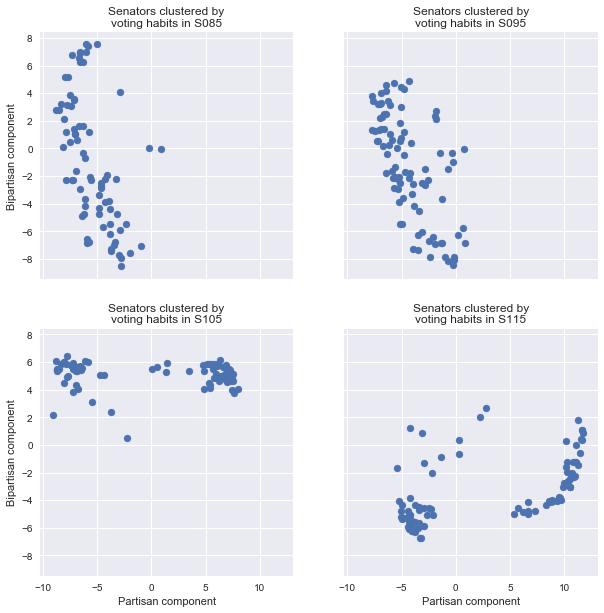

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10,10))

ax[0,0].scatter(T_S085[:,0], T_S085[:,1])
ax[0,0].set_title("Senators clustered by\nvoting habits in S085")
ax[0,0].grid('on')
ax[0,0].set_ylabel("Bipartisan component")

ax[0,1].scatter(T_S095[:,0], T_S095[:,1])
ax[0,1].set_title("Senators clustered by\nvoting habits in S095")
ax[0,1].grid('on')

ax[1,0].scatter(T_S105[:,0], T_S105[:,1])
ax[1,0].set_title("Senators clustered by\nvoting habits in S105")
ax[1,0].grid('on')
ax[1,0].set_xlabel("Partisan component")
ax[1,0].set_ylabel("Bipartisan component")


ax[1,1].scatter(T_S115[:,0], T_S115[:,1])
ax[1,1].set_title("Senators clustered by\nvoting habits in S115")
ax[1,1].grid('on')
ax[1,1].set_xlabel("Partisan component")

plt.show()